In [45]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install statsmodels

In [47]:
# Importing the dataset

dataset=pd.read_csv("D:/Data Science Project/Sales Transactions Weekly Time Series Cluster Analysis/Sales_Transactions_Dataset_Weekly.csv")

In [48]:
# Exploratory Data Analysis

print(dataset.head(5))

  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0         

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.0+ KB


In [50]:
dataset.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.085000,0.000000,0.10500,0.100000,0.110000,0.090000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.280000,0.270000,0.300000,0.310000,0.330000,0.310000,0.33000,0.330000,0.350000,0.430000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,0.490000,0.450000,0.500000,0.500000,0.500000,0.500000,0.50000,0.550000,0.560000,0.670000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
print(dataset.isnull().sum()/len(dataset))

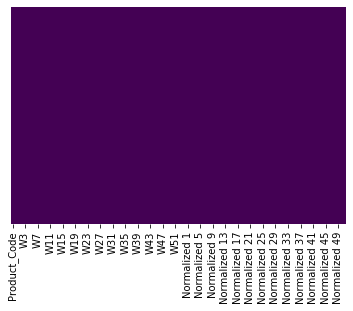

In [52]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Checking the data types
print(dataset.dtypes)

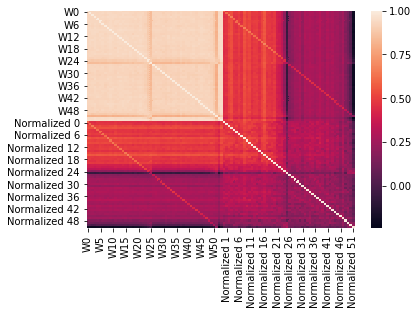

In [54]:
# Correlation Matrix Heatmap

sns.heatmap(dataset.corr())

In [55]:
dataset.shape

(811, 107)

In [56]:
dataset.corr()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
W0,1.000000,0.928234,0.927777,0.932767,0.941081,0.934089,0.937892,0.932157,0.939375,0.935207,...,0.257598,0.281876,0.252050,0.248576,0.217508,0.250772,0.168929,0.116269,0.037429,-0.194346
W1,0.928234,1.000000,0.935928,0.932626,0.929931,0.935433,0.937663,0.931325,0.939928,0.939382,...,0.261424,0.273380,0.249674,0.253492,0.218771,0.262915,0.174286,0.126263,0.033140,-0.194861
W2,0.927777,0.935928,1.000000,0.936166,0.929344,0.936200,0.928048,0.925576,0.929406,0.939855,...,0.261840,0.280806,0.252693,0.262598,0.220089,0.251521,0.173687,0.126890,0.005232,-0.201581
W3,0.932767,0.932626,0.936166,1.000000,0.932885,0.935660,0.939276,0.935071,0.942684,0.939762,...,0.255190,0.276391,0.235575,0.252990,0.218534,0.254131,0.172643,0.116963,0.015644,-0.203561
W4,0.941081,0.929931,0.929344,0.932885,1.000000,0.932268,0.932126,0.927831,0.934932,0.938131,...,0.280807,0.281308,0.247206,0.245176,0.211816,0.260400,0.179474,0.111329,0.042052,-0.193366
W5,0.934089,0.935433,0.936200,0.935660,0.932268,1.000000,0.935229,0.922236,0.928715,0.937605,...,0.272607,0.293784,0.254072,0.254720,0.215692,0.259131,0.167835,0.128601,0.038528,-0.187896
W6,0.937892,0.937663,0.928048,0.939276,0.932126,0.935229,1.000000,0.931222,0.932895,0.939389,...,0.259710,0.285339,0.254317,0.244180,0.218891,0.264028,0.186655,0.124934,0.030253,-0.203299
W7,0.932157,0.931325,0.925576,0.935071,0.927831,0.922236,0.931222,1.000000,0.931905,0.938458,...,0.259082,0.281484,0.250308,0.268120,0.222545,0.262191,0.179400,0.122743,0.024310,-0.197794
W8,0.939375,0.939928,0.929406,0.942684,0.934932,0.928715,0.932895,0.931905,1.000000,0.939157,...,0.260392,0.279507,0.239374,0.267250,0.223898,0.256486,0.170898,0.120234,0.029663,-0.189185
W9,0.935207,0.939382,0.939855,0.939762,0.938131,0.937605,0.939389,0.938458,0.939157,1.000000,...,0.268212,0.286821,0.252460,0.257991,0.231469,0.272633,0.174344,0.113088,0.031354,-0.195483


In [57]:
count=dataset.iloc[:,1:53].sum(axis=1)

In [58]:
print(type(count))

<class 'pandas.core.series.Series'>


In [59]:
y=count.head(20)

In [60]:
y

0      501
1      207
2      452
3      430
4      440
5      220
6      213
7      450
8      539
9     1010
10     601
11     203
12     470
13     615
14    1805
15    1875
16    1765
17    1682
18    1687
19     465
dtype: int64

In [61]:
count.head(20)

0      501
1      207
2      452
3      430
4      440
5      220
6      213
7      450
8      539
9     1010
10     601
11     203
12     470
13     615
14    1805
15    1875
16    1765
17    1682
18    1687
19     465
dtype: int64

In [62]:
x=dataset['Product_Code'].head(20)

In [63]:
x

0      P1
1      P2
2      P3
3      P4
4      P5
5      P6
6      P7
7      P8
8      P9
9     P10
10    P11
11    P12
12    P13
13    P14
14    P15
15    P16
16    P17
17    P18
18    P19
19    P20
Name: Product_Code, dtype: object

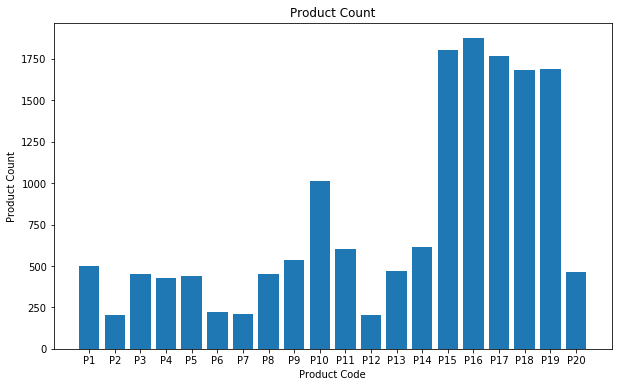

In [64]:
# Bar Plot
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xlabel('Product Code', fontsize=10)
plt.ylabel('Product Count', fontsize=10)
#plt.xticks(x, y, fontsize=10, rotation=30)
plt.title('Product Count')

plt.show()




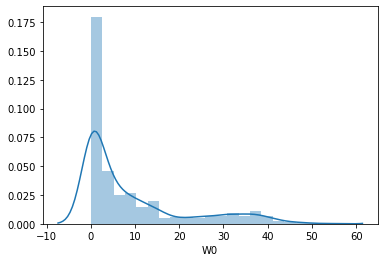

In [65]:
# Checking the distribution

sns.distplot(dataset['W0'])

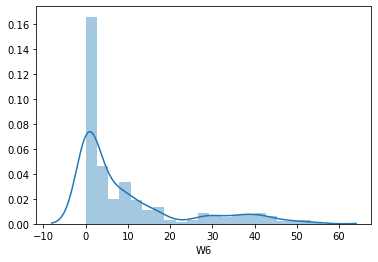

In [66]:
sns.distplot(dataset['W6'])

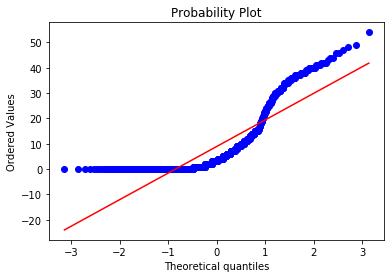

In [67]:
# Q-Q plot
stats.probplot(dataset['W0'], plot=plt);

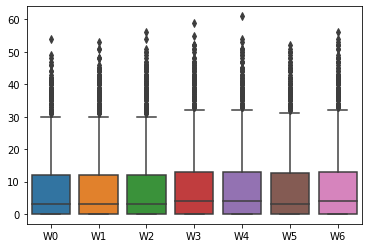

In [68]:
# Outlier Detection
sns.boxplot(data=dataset.iloc[:,1:8])

In [69]:
dataset['W0'].describe()

count    811.000000
mean       8.902589
std       12.067163
min        0.000000
25%        0.000000
50%        3.000000
75%       12.000000
max       54.000000
Name: W0, dtype: float64

In [70]:
# Computing IQR
Q1 = dataset['W0'].quantile(0.25)
Q3 = dataset['W0'].quantile(0.75)
IQR = Q3 - Q1

In [71]:
upper_bound=Q3+1.5*IQR

In [72]:
dataset_new=dataset.loc[dataset['W0']>upper_bound]

In [73]:
dataset_new

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
16,P17,49,40,40,28,40,47,44,45,39,...,0.54,0.40,0.54,0.51,0.74,0.31,0.37,0.37,0.26,0.23
17,P18,40,38,39,38,39,33,28,44,36,...,0.36,0.32,0.32,0.75,0.54,0.07,0.29,0.32,0.32,0.11
23,P24,36,42,27,33,40,48,38,39,41,...,0.62,0.56,0.64,0.46,0.44,0.64,0.23,0.67,0.46,0.00
26,P27,44,34,33,39,34,30,47,27,45,...,0.61,0.39,0.35,0.16,0.16,0.26,0.74,0.29,0.42,0.23
27,P28,34,32,36,41,31,31,32,29,43,...,0.45,0.59,0.86,0.55,0.32,0.36,0.23,0.18,0.55,0.14
29,P30,46,36,45,34,35,36,43,28,26,...,0.07,0.53,0.63,0.77,0.53,0.43,0.23,0.40,0.07,0.17
33,P34,47,42,24,55,42,23,41,51,45,...,0.19,0.06,0.47,0.72,0.72,0.34,0.34,0.69,0.56,0.09
34,P35,34,37,26,27,49,48,36,34,28,...,0.76,0.36,0.16,0.04,0.28,0.80,0.00,0.04,0.76,0.16
35,P36,41,32,39,45,38,40,39,39,27,...,0.17,0.43,0.19,0.24,0.74,0.29,0.29,0.21,0.40,0.00
36,P37,36,39,43,42,38,37,31,26,36,...,0.38,0.29,0.35,0.53,0.15,0.15,0.24,0.15,0.44,0.21


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.0+ KB


In [75]:
dataset.iloc[:,1:53]

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
5,3,3,2,7,6,3,8,6,6,3,...,4,2,4,3,6,5,3,3,10,6
6,4,8,3,7,8,7,2,3,10,3,...,2,3,3,6,2,6,2,4,2,1
7,8,6,10,9,6,8,7,5,10,10,...,10,14,4,8,8,6,7,4,9,9
8,14,9,10,7,11,15,12,7,13,12,...,11,5,13,3,7,7,10,12,7,13
9,22,19,19,29,20,16,26,20,24,20,...,14,17,11,24,13,16,18,23,18,20


In [76]:
# Dropping the Columns
dataset.drop(dataset.iloc[:,1:53],axis=1,inplace=True)

In [77]:
# dataset

In [78]:
dataset.shape

(811, 55)

In [79]:
dataset.head(10)

,Product_Code,MIN,MAX,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,3,21,0.44,0.50,0.39,0.28,0.56,0.50,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,0,10,0.70,0.60,0.30,0.20,0.70,0.10,0.60,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,3,14,0.36,0.73,0.45,0.55,0.64,0.45,0.36,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,2,19,0.59,0.35,0.65,0.18,0.41,0.24,0.41,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,3,18,0.33,0.13,0.67,0.53,0.20,0.27,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
5,P6,0,11,0.27,0.27,0.18,0.64,0.55,0.27,0.73,...,0.36,0.18,0.36,0.27,0.55,0.45,0.27,0.27,0.91,0.55
6,P7,0,10,0.40,0.80,0.30,0.70,0.80,0.70,0.20,...,0.20,0.30,0.30,0.60,0.20,0.60,0.20,0.40,0.20,0.10
7,P8,3,15,0.42,0.25,0.58,0.50,0.25,0.42,0.33,...,0.58,0.92,0.08,0.42,0.42,0.25,0.33,0.08,0.50,0.50
8,P9,3,18,0.73,0.40,0.47,0.27,0.53,0.80,0.60,...,0.53,0.13,0.67,0.00,0.27,0.27,0.47,0.60,0.27,0.67
9,P10,9,33,0.54,0.42,0.42,0.83,0.46,0.29,0.71,...,0.21,0.33,0.08,0.63,0.17,0.29,0.38,0.58,0.38,0.46


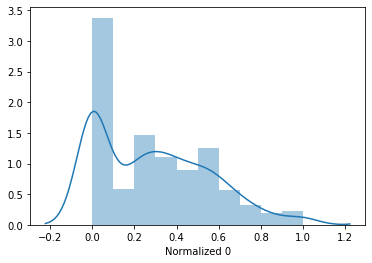

In [80]:
# Checking the distribution
sns.distplot(dataset['Normalized 0'])


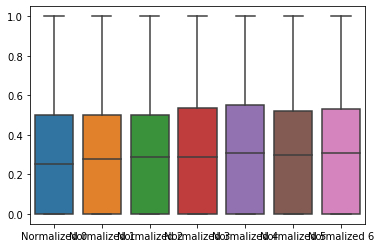

In [81]:
# Anomaly Detection
sns.boxplot(data=dataset.iloc[:,3:10])

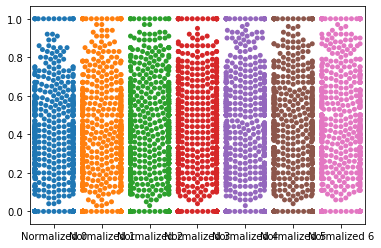

In [82]:
# Swarm Plot
sns.swarmplot(data=dataset.iloc[:,3:10])

In [83]:
# Computing IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [84]:
# print(IQR)

In [85]:
# print((dataset < (Q1 - 1.5 * IQR)) |(dataset> (Q3 + 1.5 * IQR)))

In [86]:
# # Removing Outliers
# df = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

In [87]:
# df.shape

In [88]:
# print(df.head(10))

In [89]:
# print((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR)))

In [90]:
# print(df.head(10))

In [91]:
X=dataset.iloc[:,1:].values

In [92]:
X

array([[ 3.  , 21.  ,  0.44, ...,  0.17,  0.11,  0.39],
       [ 0.  , 10.  ,  0.7 , ...,  0.1 ,  0.6 ,  0.  ],
       [ 3.  , 14.  ,  0.36, ...,  0.45,  0.45,  0.36],
       ...,
       [ 0.  ,  4.  ,  0.25, ...,  0.  ,  1.  ,  0.75],
       [ 0.  ,  2.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  3.  ,  0.  , ...,  0.  ,  0.  ,  0.33]])

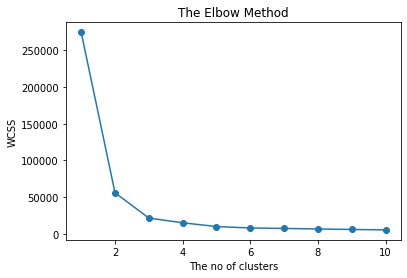

In [93]:
# Elbow Method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="random",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('The no of clusters')
plt.ylabel('WCSS')
plt.show()


In [94]:
# Implementing KMeans 
kmeans = KMeans(n_clusters=3, init='random', max_iter=1000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [ ]:
# pred_y

In [96]:
# Covariance Analysis
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(dataset.iloc[:, 1:])


In [97]:
data_rescaled

array([[0.125     , 0.27777778, 0.44      , ..., 0.17      , 0.11      ,
        0.39      ],
       [0.        , 0.125     , 0.7       , ..., 0.1       , 0.6       ,
        0.        ],
       [0.125     , 0.18055556, 0.36      , ..., 0.45      , 0.45      ,
        0.36      ],
       ...,
       [0.        , 0.04166667, 0.25      , ..., 0.        , 1.        ,
        0.75      ],
       [0.        , 0.01388889, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.02777778, 0.        , ..., 0.        , 0.        ,
        0.33      ]])

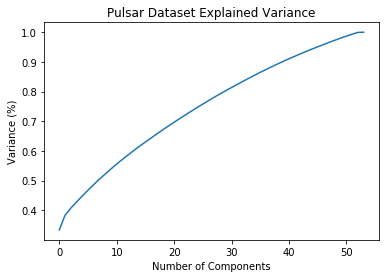

In [98]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [99]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)

In [100]:
data_reduced=pd.DataFrame(data_reduced)

In [101]:
data_reduced.columns=['PC1','PC2']

In [102]:
data_reduced.head()

,PC1,PC2
0,4.171502,-2.281277
1,-7.179953,-1.562828
2,-2.372526,-0.291361
3,1.950069,-2.563874
4,1.349474,-1.351601


In [103]:
data_reduced['Cluster']=pred_y

In [104]:
data_reduced.Cluster.unique()

array([1, 0, 2], dtype=int64)

In [105]:
kmeans.cluster_centers_[1]

array([ 3.79802956, 21.34482759,  0.44083744,  0.42891626,  0.44768473,
        0.44743842,  0.46472906,  0.48054187,  0.47330049,  0.46364532,
        0.47098522,  0.46817734,  0.47714286,  0.50527094,  0.48246305,
        0.46408867,  0.47674877,  0.49103448,  0.49743842,  0.50241379,
        0.48325123,  0.47448276,  0.47650246,  0.48423645,  0.51024631,
        0.511133  ,  0.60566502,  0.56541872,  0.278867  ,  0.30221675,
        0.29862069,  0.28428571,  0.31182266,  0.32014778,  0.33      ,
        0.32679803,  0.34842365,  0.36004926,  0.31847291,  0.35330049,
        0.35349754,  0.33472906,  0.33300493,  0.35256158,  0.34315271,
        0.35669951,  0.36305419,  0.35655172,  0.37004926,  0.39182266,
        0.3991133 ,  0.43615764,  0.4846798 ,  0.56955665])

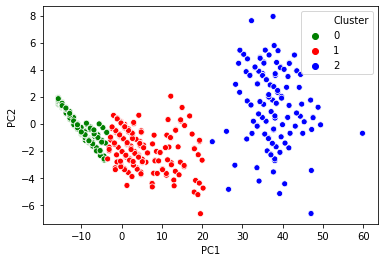

In [106]:
sns.scatterplot(x='PC1',y='PC2',data=data_reduced,hue='Cluster',palette={0:'green',1:'red',2:'blue'})